# AmRest - pre POC analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

## Data preparation

In [2]:
def load_sales_data():
    hours = ['0'+str(x)+':00' if x < 10 else str(x)+':00' for x in range(24)]
    hour_type = pd.CategoricalDtype(categories=hours, ordered=True)

    dtype={'GUESTCHECKID': object,
           'Date': str,
           'HourName': hour_type,
           'QuarterName': "category",
           'GUESTCHECK_SalesNet': np.float64,
           'GUESTCHECK_SalesTax': np.float64,
           'Product': "category",
           'FamilyGroup': "category",
           'MajorGroup': "category",
           'MPK': object,
           'Restaurant': object,
           'LocationType': "category",
           'Concept': "category",
           'ItemType': "category",
           'ComboMealNum': np.float64,
           'ile_razy': np.float64,
           'SalesChannel': "category"
           }
    parse_dates = ['Date']

    data = pd.read_csv(os.path.join(os.environ['DATA_PATH'],
                                    'kiosk_produkty/KIOSK_Produkty.csv'),
                       delimiter=";", thousands=',',
                       dtype=dtype,
                       parse_dates=parse_dates)
    return data

In [3]:
%%time
data = load_sales_data()

CPU times: user 49.6 s, sys: 4.26 s, total: 53.8 s
Wall time: 53.8 s


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18684176 entries, 0 to 18684175
Data columns (total 19 columns):
GUESTCHECKID           object
Date                   datetime64[ns]
HourName               category
QuarterName            category
GUESTCHECK_SalesNet    float64
GUESTCHECK_SalesTax    float64
Product                category
FamilyGroup            category
MajorGroup             category
Product_SalesNet       float64
Product_SalesTax       float64
MPK                    object
Restaurant             object
LocationType           category
Concept                category
ItemType               category
ComboMealNum           float64
ile_razy               float64
SalesChannel           category
dtypes: category(9), datetime64[ns](1), float64(6), object(3)
memory usage: 1.6+ GB


#### Create yearn and month variable

In [5]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [6]:
data['year'] = pd.DatetimeIndex(data['Date']).year

#### Convert to PLN Move comma so values correspond to PLN

In [7]:
data['GUESTCHECK_SalesNet'] = data['GUESTCHECK_SalesNet'] / 1000000
data['GUESTCHECK_SalesTax'] = data['GUESTCHECK_SalesTax'] / 1000000
data['Product_SalesNet'] = data['Product_SalesNet'] / 1000000
data['Product_SalesTax'] = data['Product_SalesTax'] / 1000000

In [8]:
id_columns = ['GUESTCHECKID', 'MPK', 'Restaurant']
categorical = ['Product', 'FamilyGroup', 'MajorGroup', 'LocationType', 'Concept', 'ItemType', 'SalesChannel']

## Data exploration

In [9]:
%%time
data.describe()

CPU times: user 5.81 s, sys: 3.97 s, total: 9.78 s
Wall time: 9.78 s


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
count,18684175.000,18684175.000,18684175.000,18684175.000,18684175.000,18684175.000,18684175.000,18684175.000
mean,23.784,1.802,2.830,0.214,1.013,1.052,5.044,2018.719
std,19.485,1.614,4.158,0.313,0.971,0.277,3.764,0.450
min,-94.117,-9.483,0.000,0.000,0.000,1.000,1.000,2018.000
25%,10.381,0.593,0.000,0.000,0.000,1.000,2.000,2018.000
50%,19.771,1.474,1.861,0.096,1.000,1.000,4.000,2019.000
75%,32.868,2.519,3.657,0.293,1.000,1.000,8.000,2019.000
max,591.329,42.790,53.048,3.533,33.000,33.000,12.000,2019.000


In [10]:
data.head()

,GUESTCHECKID,Date,HourName,QuarterName,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product,FamilyGroup,MajorGroup,Product_SalesNet,...,MPK,Restaurant,LocationType,Concept,ItemType,ComboMealNum,ile_razy,SalesChannel,month,year
0,892332904,2018-01-01,11:00,15-30,56.028,3.722,Customer,Promos,Food,0.000,...,103019,KFC Wroclaw Delikatesy,ILS,STANDARD,0,0.000,1.000,Dine In,1.000,2018.000
1,892332904,2018-01-01,11:00,15-30,56.028,3.722,Filler,Burgers & Sandwiches,Food,4.714,...,103019,KFC Wroclaw Delikatesy,ILS,STANDARD,0,0.000,2.000,Dine In,1.000,2018.000
2,892332904,2018-01-01,11:00,15-30,56.028,3.722,mBitesStandard,Menus,Food,0.000,...,103019,KFC Wroclaw Delikatesy,ILS,STANDARD,2,1.000,1.000,Dine In,1.000,2018.000
3,892332904,2018-01-01,11:00,15-30,56.028,3.722,PepsiRefill,Cold Beverages,Beverage,2.886,...,103019,KFC Wroclaw Delikatesy,ILS,STANDARD,1,1.000,1.000,Dine In,1.000,2018.000
4,892332904,2018-01-01,11:00,15-30,56.028,3.722,LargeFries,Sides,Food,3.286,...,103019,KFC Wroclaw Delikatesy,ILS,STANDARD,1,1.000,1.000,Dine In,1.000,2018.000


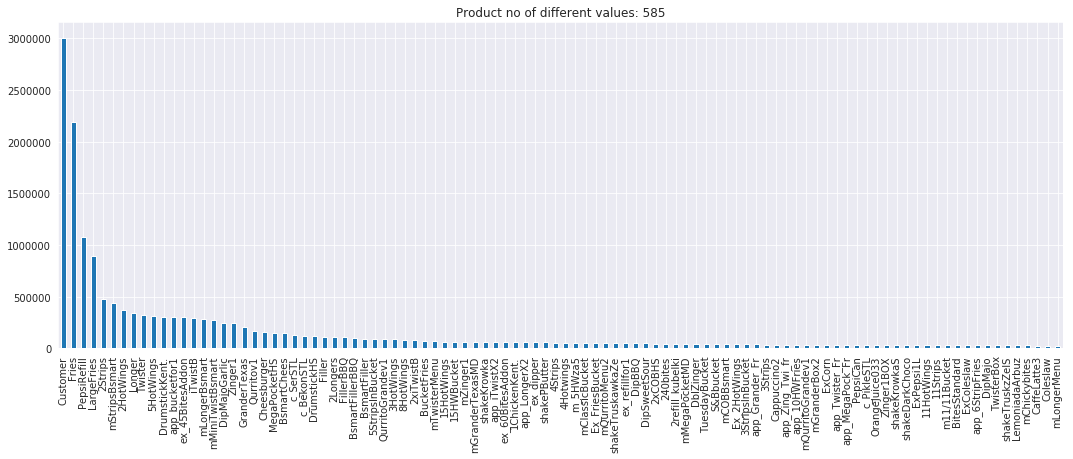

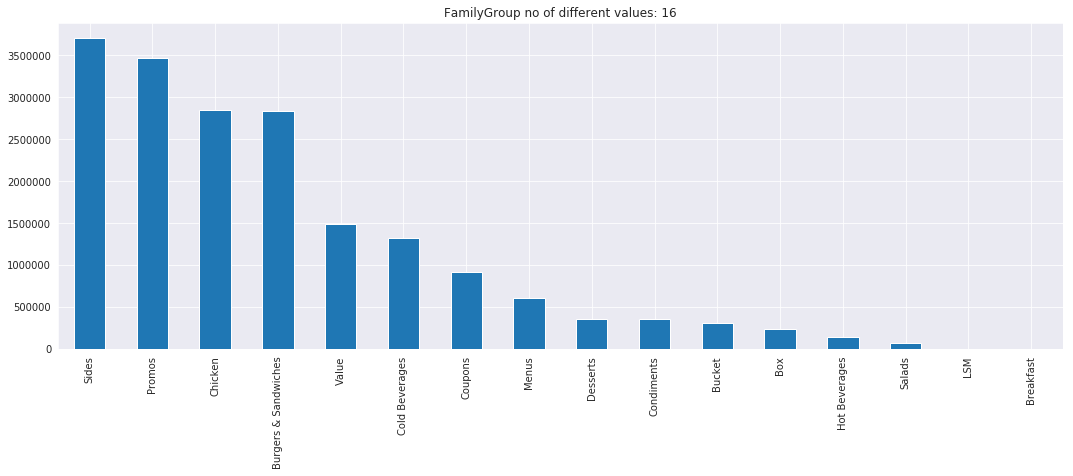

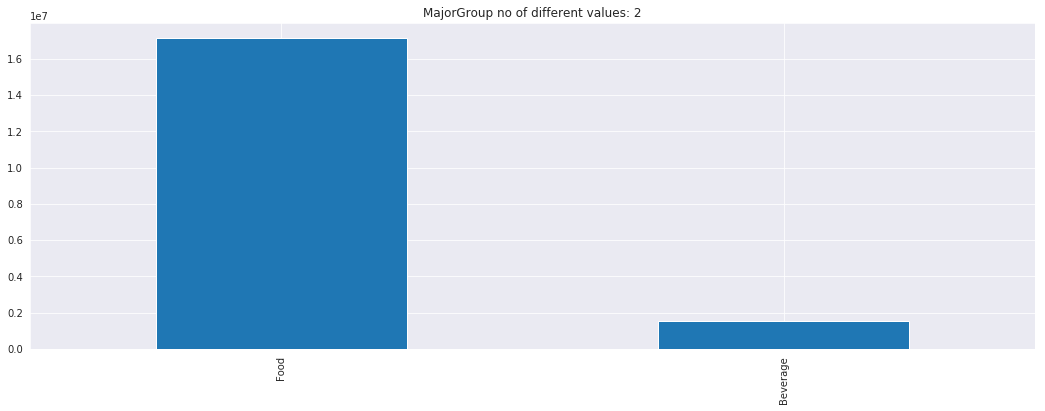

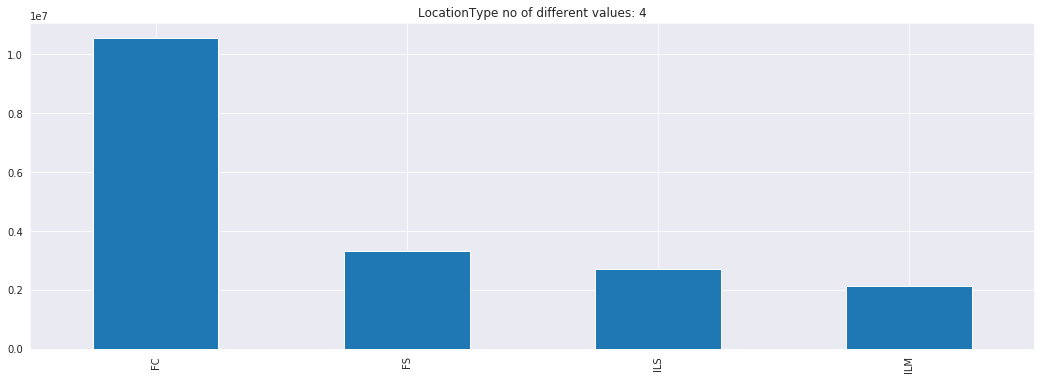

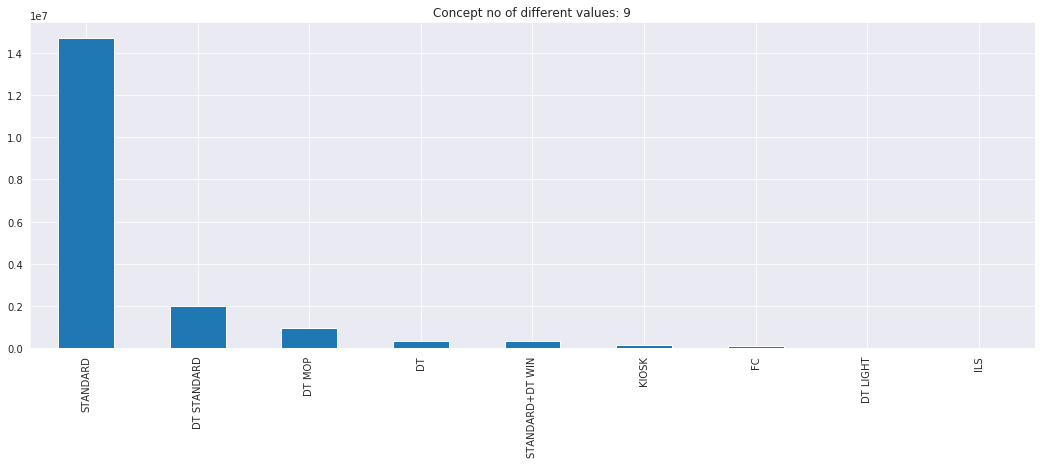

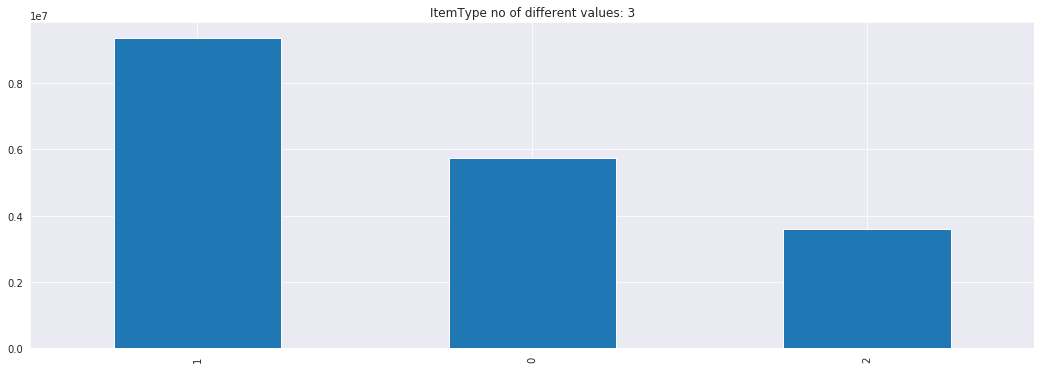

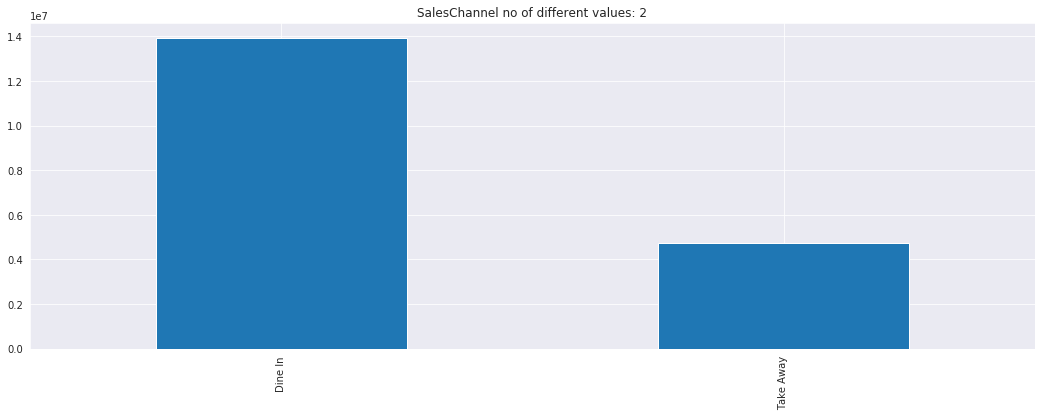

In [11]:
limit = 100
for col in categorical:
    fig = plt.figure(figsize=(18,6))
    val_counts = data[col].value_counts()
    
    
    val_counts[:limit].plot.bar()
    plt.title(col + f" no of different values: {len(val_counts)}")
    plt.show()

### Legend

**LocationType/Concept**:
- FC - Food Court (wspólna przestrzeń do jedzenia dla kilku restauracji, np. galerie handlowe)
- FS -Free Stand (wolnostojący budynek, osobny, np. z Drive Thru)
- ILM - In Line Mall (restauracja w ciągu np. W galerii, ale z osobną przestrzenią do jedzenia – tylko dla danej restauracji)
- ILS - In Line Street (restauracja w ciągu sklepów, ale wejście od ulicy)
- DT - Drive Thru

**ItemType**:
- "2" - oznacza menu/zestaw 
-  "1" - produkty składające się na dany zestaw.
- "0" - produkt solo

### Conclusions
1. There is a large number of different products. Some of them should be treated differently like 'customer', 'coupon'.
2. 

# Average cart size

## Mean cart size by category

In [12]:
for col in categorical:
    display(data.groupby(col).mean().sort_values('GUESTCHECK_SalesNet', ascending=False).head(15))

,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
Product,,,,,,,,
4xCorn,111.379,7.301,10.185,0.815,1.000,1.000,7.000,2018.000
5xDipper,107.955,5.745,11.574,0.926,1.000,1.000,7.000,2018.000
Bites705gram,105.038,6.410,37.634,2.066,1.167,1.000,3.167,2019.000
Bites570gram,96.644,5.381,0.000,0.000,1.000,1.000,4.500,2019.000
6ChickenHS,96.165,6.560,23.291,1.509,1.000,1.000,4.000,2019.000
Bites585gram,95.370,5.905,31.143,1.557,1.000,1.000,3.000,2019.000
4xColeslaw,93.094,7.246,10.185,0.815,1.500,1.000,8.000,2018.000
18Strips,91.896,6.208,39.536,2.414,1.125,1.000,3.938,2018.875
3xColeslaw,84.368,4.956,8.333,0.667,1.000,1.000,8.889,2018.000


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
FamilyGroup,,,,,,,,
Bucket,38.396,2.728,0.000,0.000,1.155,1.000,5.074,2018.708
Box,36.422,2.884,0.000,0.000,1.279,1.000,4.904,2018.737
Salads,34.204,2.614,7.405,0.490,0.343,1.145,4.974,2018.722
Cold Beverages,30.257,2.612,3.107,0.692,1.031,1.027,4.915,2018.735
Menus,29.862,2.411,0.000,0.000,1.368,1.000,4.912,2018.731
Condiments,26.064,1.962,1.174,0.085,0.823,1.071,5.058,2018.723
Chicken,25.602,1.881,5.301,0.311,1.342,1.073,4.941,2018.733
Sides,24.474,1.832,2.525,0.152,1.312,1.126,5.090,2018.715
Burgers & Sandwiches,23.232,1.708,6.720,0.409,1.103,1.042,5.105,2018.706


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
MajorGroup,,,,,,,,
Beverage,29.242,2.583,3.175,0.711,0.890,1.040,4.956,2018.732
Food,23.284,1.730,2.799,0.169,1.024,1.053,5.052,2018.717


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
LocationType,,,,,,,,
FS,31.517,2.700,3.366,0.287,1.093,1.069,3.985,2018.881
FC,22.668,1.543,2.721,0.187,1.008,1.050,5.617,2018.645
ILM,22.317,1.861,2.704,0.225,1.015,1.049,4.451,2018.820
ILS,19.830,1.663,2.698,0.225,0.934,1.039,4.573,2018.726


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
Concept,,,,,,,,
DT LIGHT,32.588,2.855,3.300,0.286,1.095,1.070,3.853,2019.000
DT STANDARD,31.967,2.733,3.302,0.281,1.129,1.071,4.231,2018.819
DT MOP,31.052,2.692,3.574,0.306,1.000,1.069,3.635,2018.977
DT,29.751,2.495,3.192,0.266,1.111,1.064,3.368,2018.980
STANDARD+DT WIN,26.651,2.313,2.965,0.256,1.105,1.062,5.032,2018.739
ILS,25.875,1.525,3.103,0.183,1.080,1.079,4.350,2019.000
FC,24.078,1.595,3.031,0.201,0.984,1.059,3.248,2018.939
STANDARD,21.985,1.591,2.706,0.198,0.993,1.047,5.316,2018.677
KIOSK,21.337,1.450,2.584,0.179,1.004,1.043,3.755,2018.898


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
ItemType,,,,,,,,
1,24.988,1.883,3.944,0.278,1.446,1.068,5.030,2018.721
2,23.244,1.734,0.000,0.000,1.499,1.000,5.078,2018.714
0,22.154,1.711,2.789,0.246,0.000,1.058,5.045,2018.718


,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
SalesChannel,,,,,,,,
Dine In,24.161,1.959,2.822,0.230,1.013,1.044,5.091,2018.711
Take Away,22.679,1.342,2.853,0.170,1.013,1.073,4.907,2018.740


## Date and time

### Year

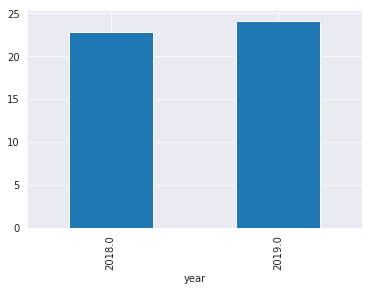

In [13]:
data.groupby('year').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.show()

### Month

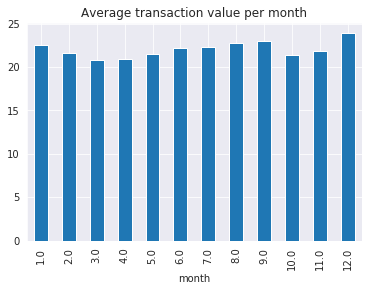

In [14]:
data[data['year']==2018.000].groupby('month').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.title("Average transaction value per month")
plt.show()

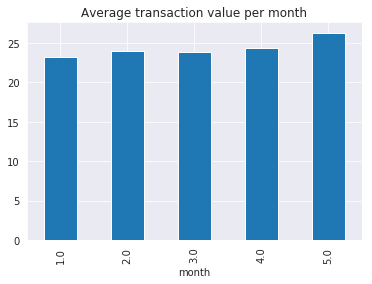

In [15]:
data[data['year']==2019.000].groupby('month').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.title("Average transaction value per month")
plt.show()

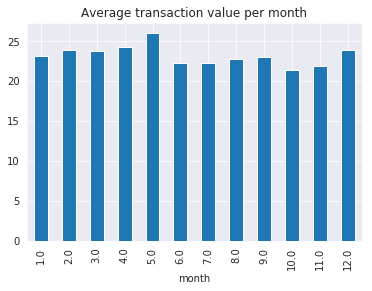

In [16]:
data.groupby('month').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.title("Average transaction value per month")
plt.show()

### Quarter of an hour

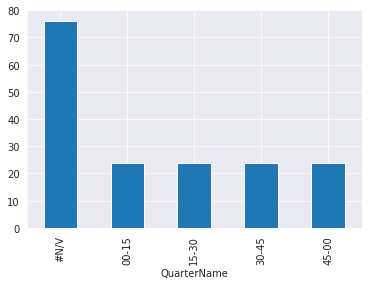

In [17]:
data.groupby('QuarterName').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.show()

No difference, as expected.

### Hour

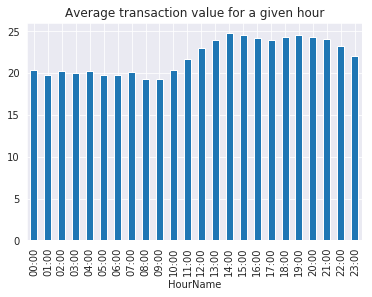

In [18]:
data.groupby('HourName').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.title("Average transaction value for a given hour")
plt.show()

### Date

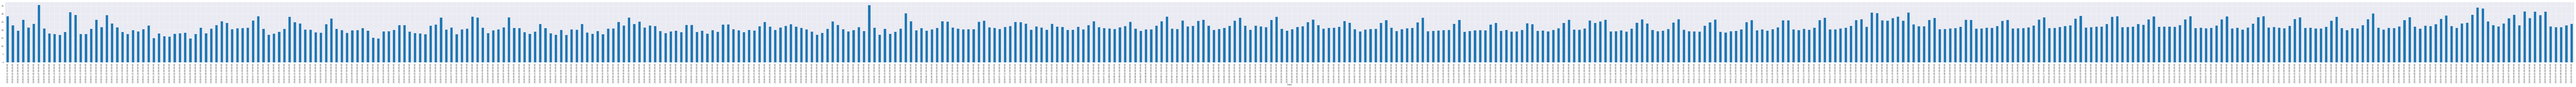

In [19]:
fig = plt.figure(figsize=(250,6))
data.groupby('Date').mean()['GUESTCHECK_SalesNet'].plot.bar()
plt.show()

In [20]:
sales_by_day = data.groupby('Date').mean()

#### Best days

We will explore best and worst days in the past in terms of guest checkout cart value. Maybe we will have some ideas about why on particular days people buy more or less.

In [21]:
q = sales_by_day['GUESTCHECK_SalesNet'].quantile(0.95)
sales_by_day[sales_by_day['GUESTCHECK_SalesNet'] > q].sort_values('GUESTCHECK_SalesNet', ascending=False)

,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
Date,,,,,,,,
2018-01-07,35.640,2.514,3.489,0.237,1.172,1.101,1.000,2018.000
2018-06-16,35.473,2.691,3.066,0.246,1.162,1.042,6.000,2018.000
2019-04-21,33.994,2.883,3.436,0.286,1.045,1.083,4.000,2019.000
2019-04-22,33.472,2.823,3.385,0.281,1.125,1.074,4.000,2019.000
2019-05-01,31.663,2.668,3.190,0.267,1.127,1.072,5.000,2019.000
2019-05-03,31.550,2.651,3.233,0.268,1.127,1.071,5.000,2019.000
2019-05-05,31.528,2.582,3.302,0.265,1.100,1.074,5.000,2019.000
2018-01-13,31.213,2.106,3.397,0.221,1.031,1.079,1.000,2018.000
2018-12-25,30.957,2.747,3.493,0.307,0.893,1.107,12.000,2018.000


#### Worst days

In [22]:
q = sales_by_day['GUESTCHECK_SalesNet'].quantile(0.5)
sales_by_day[sales_by_day['GUESTCHECK_SalesNet'] < q].sort_values('GUESTCHECK_SalesNet')

,GUESTCHECK_SalesNet,GUESTCHECK_SalesTax,Product_SalesNet,Product_SalesTax,ComboMealNum,ile_razy,month,year
Date,,,,,,,,
2018-03-13,14.845,0.971,2.350,0.154,0.813,1.106,3.000,2018.000
2018-02-05,14.892,0.928,2.543,0.161,0.769,1.017,2.000,2018.000
2018-01-29,15.108,1.058,2.636,0.171,0.704,1.008,1.000,2018.000
2018-03-12,15.280,1.038,2.419,0.168,0.820,1.024,3.000,2018.000
2018-02-01,16.002,0.989,2.490,0.154,0.818,1.022,2.000,2018.000
2018-01-31,16.287,1.022,2.595,0.166,0.830,1.029,1.000,2018.000
2018-01-11,17.011,1.061,2.628,0.163,0.895,1.035,1.000,2018.000
2018-04-19,17.081,1.341,2.771,0.221,0.871,1.024,4.000,2018.000
2018-04-17,17.155,1.353,2.841,0.226,0.887,1.026,4.000,2018.000


## Popular items by concept type

In [23]:
list(data['Concept'].unique())

['STANDARD',
 'DT STANDARD',
 'STANDARD+DT WIN',
 'DT MOP',
 'DT',
 'KIOSK',
 'FC',
 'DT LIGHT',
 'ILS',
 nan]

In [24]:
concept_types =[
'STANDARD',
 'DT STANDARD',
 'STANDARD+DT WIN',
 'DT MOP',
 'DT',
 'KIOSK',
 'FC',
 'DT LIGHT',
 'ILS']

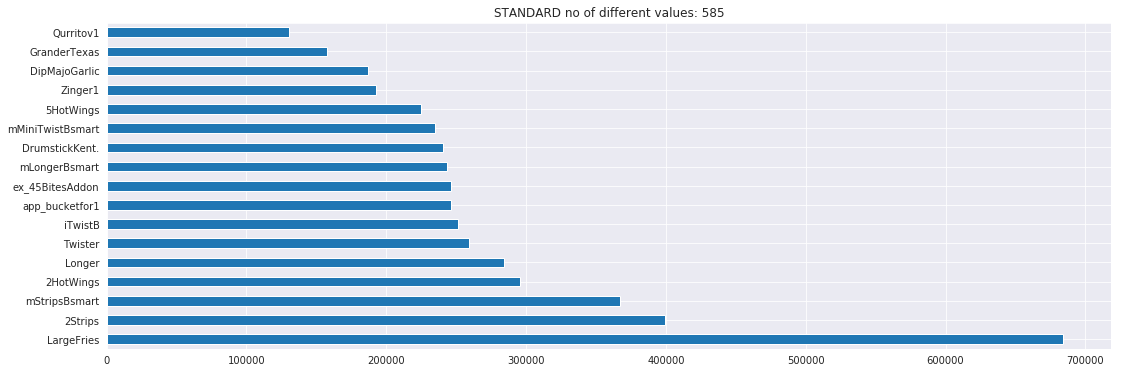

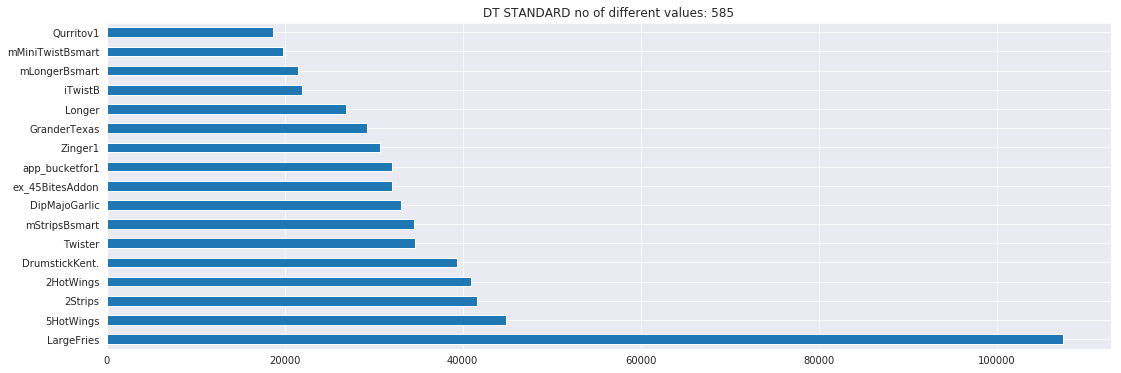

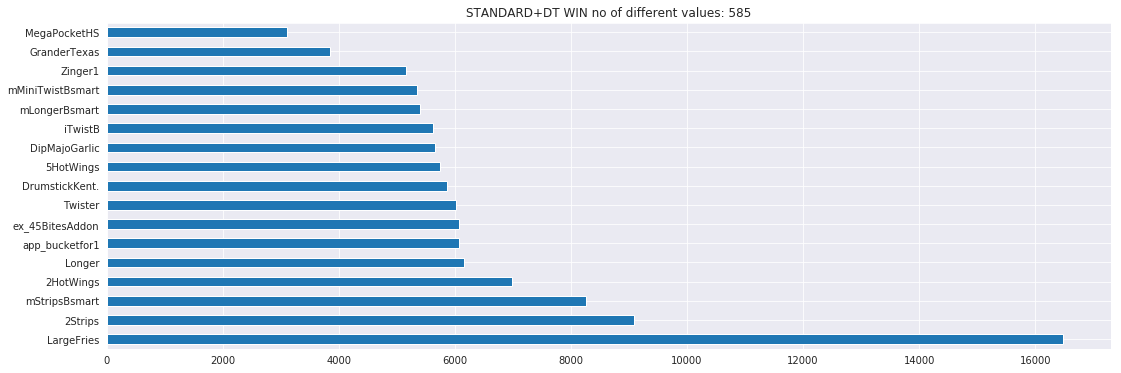

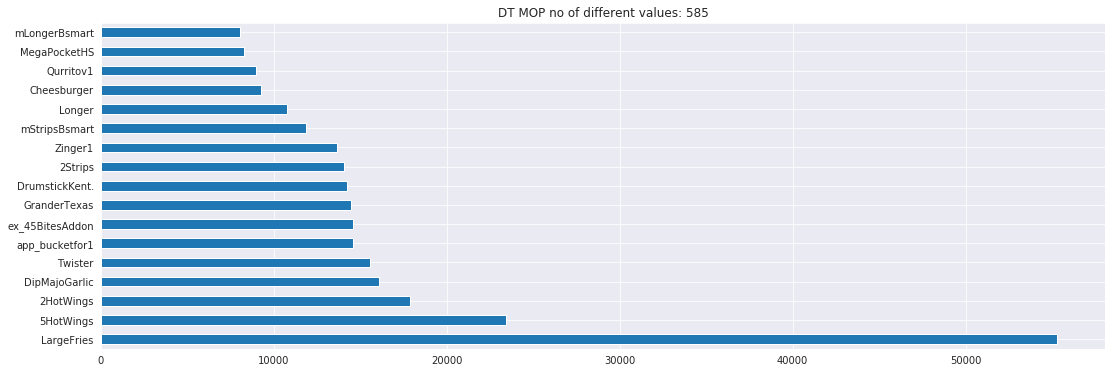

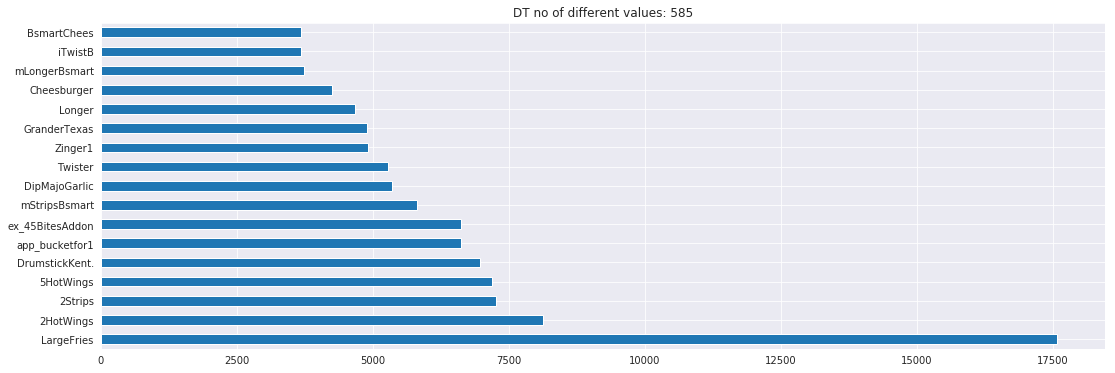

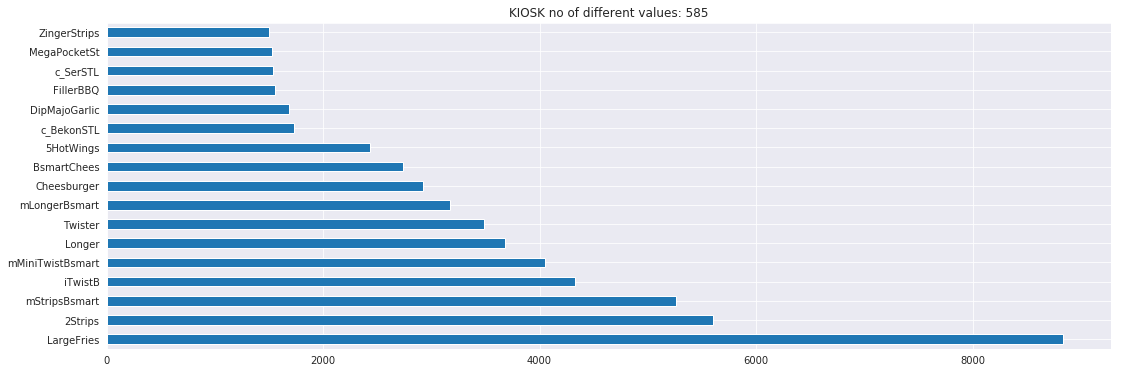

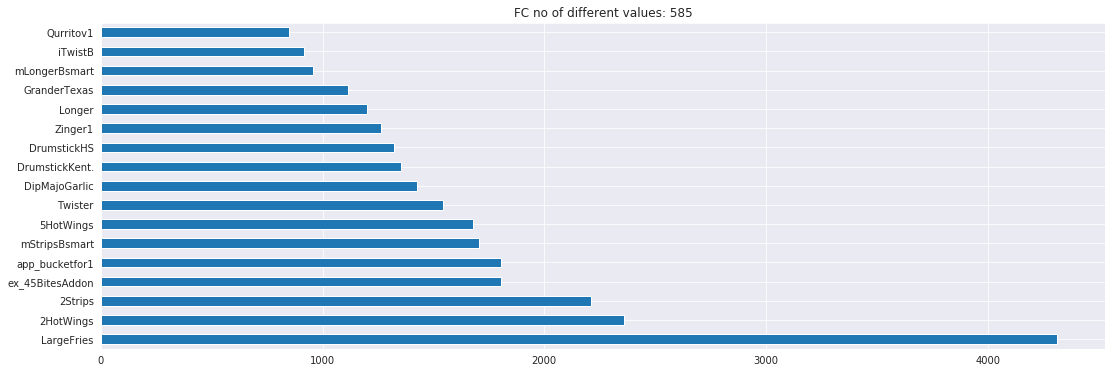

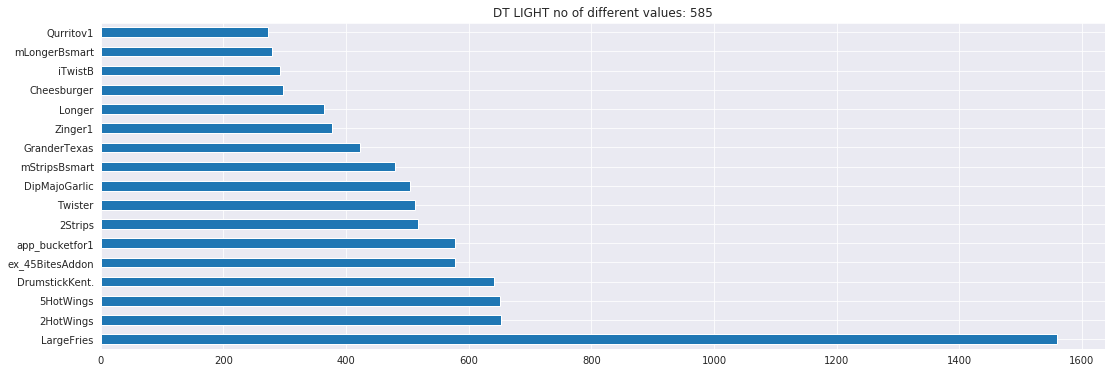

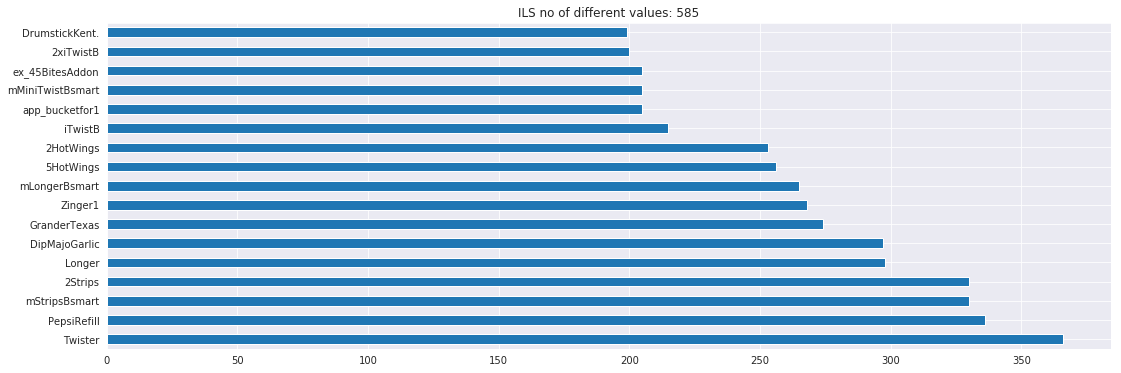

In [25]:
limit = 20
for conc in concept_types:
    fig = plt.figure(figsize=(18,6))
    val_counts = data[data['Concept']==conc]['Product'].value_counts()
    val_counts[3:limit].plot.barh()
    plt.title(conc + f" no of different values: {len(val_counts)}")
    plt.show()

# Conclusion
- It seems that in general difference between Kiosk and Drive Thru is that
    - people generaly buy **smaller sets** sets in Kiosk like Bsmart
    - people generally buy **larger sets** in Drive Thru like BucketFor1

# TODOs

## Number of customers

## Average revenue

## Decision tree

## Dask

In [157]:
! pip install dask[complete]

You should consider upgrading via the 'pip install --upgrade pip' command.


In [243]:
import dask.dataframe as dd

In [244]:
%%time
df = dd.read_csv(data_path, delimiter=";", error_bad_lines=False)

CPU times: user 76 ms, sys: 0 ns, total: 76 ms
Wall time: 72.9 ms
